In [1]:
import pandas as pd
from pandas.io.json import json_normalize
import json
import matplotlib.pyplot as plt
import matplotlib
from scipy.stats import spearmanr
import seaborn as sns
import re
import numpy as np
import ast
import pickle

# Reading in and preprocess the data by deleting useless columns and converting coded strings to ints

df = pd.read_csv('youtube1000.csv')

In [2]:
#initial shape and types
df.shape

(1000, 43)

In [3]:
df.dtypes

Unnamed: 0                              int64
search_word                            object
contentDetails.caption                   bool
contentDetails.definition              object
contentDetails.dimension               object
contentDetails.duration                object
contentDetails.licensedContent           bool
contentDetails.projection              object
etag                                   object
id                                     object
kind                                   object
snippet.categoryId                      int64
snippet.channelId                      object
snippet.channelTitle                   object
snippet.defaultAudioLanguage           object
snippet.defaultLanguage                object
snippet.description                    object
snippet.liveBroadcastContent           object
snippet.localized.description          object
snippet.localized.title                object
snippet.publishedAt                    object
snippet.tags                      

In [4]:
df['snippet.channelId'].value_counts()

UCRijo3ddMTht_IHyNSNXpNQ    46
UCaXkIU1QidjPwiAYu6GcHjg    15
UCaEEm-0s0x3MHg9jzFcHuQQ    15
UCVXCo0W9pk2dDkEBNLhTt7A    10
UCc2wpI97rT7TZGkhnylYgDA     9
UC3SEvBYhullC-aaEmbEQflg     7
UCj34AOIMl_k1fF7hcBkD_dw     7
UCCp4IWg4A_JLexo30Jlf-UQ     7
UCEdvpU2pFRCVqU6yIPyTpMQ     6
UCqZQlzSHbVJrwrn5XvzrzcA     6
UCpGdL9Sn3Q5YWUH2DVUW1Ug     6
UC7m4k9X2pRxuvzpwSz5jWgQ     6
UCv0cBz_Vdmd84xYl7gKWwQA     5
UCpJ6Dn01AqjvFVN2EiK72Ag     5
UCsTcErHg8oDvUnTzoqsYeNw     5
UCwobzUc3z-0PrFpoRxNszXQ     5
UCpVm7bg6pXKo1Pr6k5kxG9A     4
UCejVe2sNPjjvfCXg35q_EQQ     4
UCeY0bbntWzzVIaj2z3QigXg     4
UClFZ58k3TunTz8QVp-9e1Vw     4
UCq-9jiz3k4LP6F39pZoq8MQ     4
UCm6GSA5OROHcIBNkXkH53zQ     4
UCeoRAN5sr02w8_9aFWxIM4g     4
UCFoez1Xjc90CsHvCzqKnLcw     3
UCzrdtk6p4SaakMz2ZmOkCQQ     3
UC16niRr50-MSBwiO3YDb3RA     3
UCFHZHhZaH7Rc_FOMIzUziJA     3
UCGxjDWAN1KwrkXYVi8CXtjQ     3
UCKy3MG7_If9KlVuvw3rPMfw     3
UCqnW0v3DXxt0Svv0H64TVZQ     3
                            ..
UCsDWz_Oun4fWPPIzvC_EVZg     1
UCF_4vG3

In [5]:
print('Too many different values of channel IDs and not enough data to make this meaningful so I will exclude')

Too many different values of channel IDs and not enough data to make this meaningful so I will exclude


In [6]:
#Reviewed each of these columns and decided to drop because they will add too much noise
df = df.drop(columns=['contentDetails.dimension', 'contentDetails.projection','etag', 'id',
                     'kind','snippet.channelId', 'snippet.thumbnails.default.height',
                     'snippet.thumbnails.default.url', 'snippet.thumbnails.default.width',
                     'snippet.thumbnails.high.height', 'snippet.thumbnails.high.url',
                     'snippet.thumbnails.high.width', 'snippet.thumbnails.maxres.height',
                     'snippet.thumbnails.maxres.url', 'snippet.thumbnails.maxres.width',
                     'snippet.thumbnails.medium.height', 'snippet.thumbnails.medium.url',
                     'snippet.thumbnails.medium.width', 'snippet.thumbnails.standard.height',
                     'snippet.thumbnails.standard.url', 'snippet.thumbnails.standard.width',
                      'snippet.defaultAudioLanguage', 'snippet.defaultLanguage',
                      'snippet.liveBroadcastContent','Unnamed: 0',                      
                      'snippet.channelTitle', 'statistics.favoriteCount'
                     ])




df=df.rename(columns = {'statistics.dislikeCount':'dislikeCount'})
df=df.rename(columns = {'statistics.commentCount':'commentCount'})
df=df.rename(columns = {'statistics.likeCount':'likeCount'})
df=df.rename(columns = {'statistics.viewCount':'viewCount'})
df=df.rename(columns = {'snippet.categoryId':'catID'})
df=df.rename(columns = {'contentDetails.licensedContent':'licensed'})



print(df.shape)
print(df.columns)
print(df.describe())

(1000, 16)
Index(['search_word', 'contentDetails.caption', 'contentDetails.definition',
       'contentDetails.duration', 'licensed', 'catID', 'snippet.description',
       'snippet.localized.description', 'snippet.localized.title',
       'snippet.publishedAt', 'snippet.tags', 'snippet.title', 'commentCount',
       'dislikeCount', 'likeCount', 'viewCount'],
      dtype='object')
             catID   commentCount  dislikeCount     likeCount     viewCount
count  1000.000000     963.000000  9.900000e+02  9.900000e+02  9.970000e+02
mean     20.248000   11468.477674  8.526747e+03  1.502547e+05  1.576084e+07
std       6.927517   53501.023334  5.519503e+04  7.402962e+05  9.327645e+07
min       1.000000       0.000000  0.000000e+00  0.000000e+00  4.800000e+01
25%      17.000000      89.500000  2.700000e+01  5.800000e+02  3.003100e+04
50%      22.000000     549.000000  2.055000e+02  3.794000e+03  2.345960e+05
75%      25.000000    2981.000000  1.732000e+03  2.818075e+04  2.433079e+06
max     

In [7]:
# Rename word columns to be descriptive
df=df.rename(columns = {'snippet.description':'description'})
df=df.rename(columns = {'snippet.localized.description':'localized.description'})
df=df.rename(columns = {'snippet.localized.title':'localized.title'})
df=df.rename(columns = {'snippet.tags':'tags'})
df=df.rename(columns = {'snippet.title':'title'})



In [8]:
# Address Null values. Utilized mean value to address missing continuous data
# Convert and drop snippet.tags, date columns.   

df['commentCount'].fillna((df['commentCount'].mean()), inplace=True)
df['dislikeCount'].fillna((df['dislikeCount'].mean()), inplace=True)
df['likeCount'].fillna((df['likeCount'].mean()), inplace=True)
df['viewCount'].fillna((df['viewCount'].mean()), inplace=True)
# df['snippet.tags'].fillna('[]', inplace=True)

# #Convert snippet.tags into length for continuous data
# df['tags_length'] = [len(ast.literal_eval(row)) for row in df['snippet.tags']]
# df = df.drop(columns=['snippet.tags'])




1554094588.0
    search_word  contentDetails.caption contentDetails.definition  \
276       music                   False                        hd   
286       music                    True                        hd   
258       music                    True                        hd   
260       music                   False                        hd   
267       music                   False                        hd   
261       music                   False                        hd   
265       music                   False                        hd   
282       music                    True                        hd   
269       music                   False                        hd   
270       music                    True                        hd   
384      sports                    True                        hd   

    contentDetails.duration  licensed  catID  \
276                 PT3M45S      True     10   
286                 PT4M31S      True     10   
258           

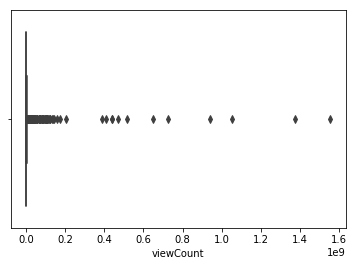

In [9]:
sns.boxplot(df['viewCount'])

print(df['viewCount'].max())

print(df.sort_values('viewCount',ascending = False).head(11))



In [10]:
print('Since there only 11 outliers, almost all from music category, we will remove them')
df1 = df.sort_values('viewCount',ascending = False).head(11)
df = df.drop(index=df1.index)

Since there only 11 outliers, almost all from music category, we will remove them


In [11]:
#  This problem could be treated as a regressive problem instead of classification.  Could experiment with precise view count prediction
bucket = []
for i in range(8000):  
    bucket.append((i*200000))

In [12]:
# Bucketize the dependent variable / viewCount
df['view_bucket'] = pd.cut(df['viewCount'], bucket, 
                           include_lowest=True, labels=list(range(1, 8000)))
df['view_bucket'] = df['view_bucket'].astype(float)


In [13]:
print(df['view_bucket'].value_counts())

1.0      481
2.0       67
3.0       54
4.0       36
6.0       21
5.0       21
11.0      16
8.0       14
7.0       12
14.0      11
9.0        8
12.0       8
10.0       8
17.0       7
24.0       7
13.0       5
28.0       5
15.0       5
18.0       5
27.0       5
20.0       4
26.0       4
55.0       3
79.0       3
32.0       3
149.0      3
23.0       3
54.0       3
21.0       3
29.0       3
        ... 
444.0      1
115.0      1
30.0       1
106.0      1
47.0       1
276.0      1
293.0      1
116.0      1
89.0       1
148.0      1
544.0      1
72.0       1
56.0       1
279.0      1
34.0       1
417.0      1
670.0      1
681.0      1
465.0      1
585.0      1
128.0      1
78.0       1
53.0       1
150.0      1
93.0       1
130.0      1
52.0       1
59.0       1
61.0       1
222.0      1
Name: view_bucket, Length: 160, dtype: int64


In [14]:
#Converts published date into date time object and then calculate the age of video

df['date'] = pd.to_datetime(df['snippet.publishedAt'], format='%Y-%m-%dT%H:%M:%S.000Z', utc=True)
df['Aging'] = pd.to_datetime('11/28/18')
df['Age'] = df['Aging'].sub(df['date'], axis=0)
df['age_int'] = df['Age'].dt.days
print(df['age_int'].head())

0     323
1     372
2    1917
3      42
4       0
Name: age_int, dtype: int64


In [15]:
#  Create a ranking system / target where videos are ranked based on age and viewcounts. 
# Ranking order = white, blue, purple, brown, black
# Utilize a log function to determine age as rank increases. In other words, it's harder to get black belt, and not linear function
# Rankings are adjustable based on user requirements


belts = {'white':50000, 'blue':100000, 'purple':300000, 'brown':1000000, 'black':2000000}
belts_list = [20000, 100000, 300000, 1000000, 10000000]
age_list =  [180, 360, 450, 500, 525 ]       
df['target'] = 'no rank'
df['target'][(df['age_int'] < 300) & (df['viewCount'] >= 20000)] = 'white belt'
df['target'][(df['age_int'] < 400) & (df['viewCount'] >= 100000)] = 'blue belt'
df['target'][(df['age_int'] < 450)  & (df['viewCount'] >= 500000)] = 'purple belt'
df['target'][(df['age_int'] < 475) & (df['viewCount'] >= 2000000)] = 'brown belt'
df['target'][(df['age_int'] < 500) & (df['viewCount'] >= 10000000)] = 'black belt'

# if (df['age_int'] > 60 & df['age_int'] > 60 ) & (df['viewCount'] > 10000)
#     df['target'] = 'blue belt'
print(df['target'].value_counts())

no rank        367
blue belt      173
white belt     170
purple belt    111
brown belt     100
black belt      68
Name: target, dtype: int64


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  # This is added back by InteractiveShellApp.init_path()
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if sys.path[0] == '':
C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-

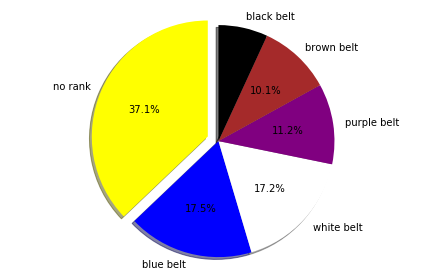

There is a high number of black belt videos because this was not a true random sample performed with the API.


In [16]:
#Visualize plot of videos collected and how they are ranked
slices = df['target'].value_counts()
labels = ['no rank','blue belt','white belt','purple belt','brown belt','black belt']
fig1, ax1 = plt.subplots()
explode = (.1, 0, 0, 0, 0, 0)  
colors = ['yellow', 'blue','white','purple', 'brown', 'black']
ax1.pie(slices, explode=explode, colors=colors, labels=labels, autopct='%1.1f%%',
        shadow=True, startangle=90)
# Equal aspect ratio ensures that pie is drawn as a circle
ax1.axis('equal')  
plt.tight_layout()
plt.show()

print('There is a high number of black belt videos because this was not a true random sample performed with the API.')

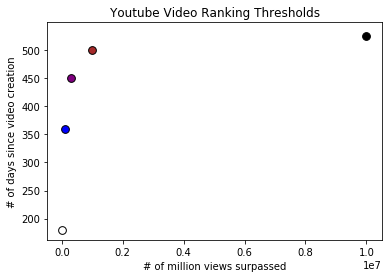

In [17]:
my_colors = {0:'white', 1:'blue',2:'purple', 3:'brown', 4:'black'}
vocabulary = [0,1,2,3,4]
for i,j in enumerate(belts_list):
    # look for the color based on vocabulary, if not found in vocubulary, then black is returned.
    plt.scatter(belts_list[i] , age_list[i], color = my_colors.get(vocabulary[i], 'black'), edgecolors='black', s=60)

plt.title('Youtube Video Ranking Thresholds')
plt.ylabel('# of days since video creation')
plt.xlabel('# of million views surpassed')
plt.show()



In [18]:
# Converts all durations into a standard unit of seconds
s = df['contentDetails.duration']
multiplication = [3600, 60, 1, 60, 1, 60, 1]
test_list = []
for item in s:
    r = re.search(r'(\d*)H(\d*)M(\d*)S|(\d*)M(\d*)S|(\d*)M|(\d*)S', item, re.I)
    resp = list(r.groups(0)) 
    resp = [int(num) for num in resp]
    test = sum([item*time_duration for item, time_duration in zip(resp, multiplication)])
    test_list.append(test)
df['duration'] = test_list    

# Drop off the original duration column since it is now not required 

    

df.info()
df.head()


<class 'pandas.core.frame.DataFrame'>
Int64Index: 989 entries, 0 to 999
Data columns (total 23 columns):
search_word                  989 non-null object
contentDetails.caption       989 non-null bool
contentDetails.definition    989 non-null object
contentDetails.duration      989 non-null object
licensed                     989 non-null bool
catID                        989 non-null int64
description                  975 non-null object
localized.description        974 non-null object
localized.title              989 non-null object
snippet.publishedAt          989 non-null object
tags                         930 non-null object
title                        989 non-null object
commentCount                 989 non-null float64
dislikeCount                 989 non-null float64
likeCount                    989 non-null float64
viewCount                    989 non-null float64
view_bucket                  989 non-null float64
date                         989 non-null datetime64[ns, UTC]


,search_word,contentDetails.caption,contentDetails.definition,contentDetails.duration,licensed,catID,description,localized.description,localized.title,snippet.publishedAt,...,dislikeCount,likeCount,viewCount,view_bucket,date,Aging,Age,age_int,target,duration
0,Siemens,False,hd,PT11M28S,True,27,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS,2018-01-08T11:53:47.000Z,...,80.0,931.0,64279.0,1.0,2018-01-08 11:53:47+00:00,2018-11-28,323 days 12:06:13,323,no rank,688
1,Siemens,False,hd,PT3M19S,False,28,"From digitalisation to automation, weƒ??re cha...","From digitalisation to automation, weƒ??re cha...",What is it like to work at Siemens?,2017-11-20T19:18:50.000Z,...,7.0,70.0,7872.0,1.0,2017-11-20 19:18:50+00:00,2018-11-28,372 days 04:41:10,372,no rank,199
2,Siemens,False,hd,PT2M40S,False,28,Are you interested in what Siemens does and wh...,Are you interested in what Siemens does and wh...,Siemens - More than just business,2013-08-28T11:07:01.000Z,...,52.0,731.0,238602.0,2.0,2013-08-28 11:07:01+00:00,2018-11-28,1917 days 12:52:59,1917,no rank,160
3,Siemens,False,hd,PT4M24S,False,28,The most powerful HVDC transformer in the worl...,The most powerful HVDC transformer in the worl...,"Siemens presents: The first 1,100 kV HVDC Tran...",2018-10-16T12:37:42.000Z,...,204.0,3835.0,177410.0,1.0,2018-10-16 12:37:42+00:00,2018-11-28,42 days 11:22:18,42,blue belt,264
4,Siemens,False,hd,PT27M43S,True,26,Articolul complet pe site: https://cavaleria.r...,Articolul complet pe site: https://cavaleria.r...,Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,2018-11-27T20:11:59.000Z,...,23.0,718.0,18839.0,1.0,2018-11-27 20:11:59+00:00,2018-11-28,0 days 03:48:01,0,no rank,1663


There are more videos aggregated around 2019.  Since the searches were performed recently,this means that more recently published videos are more relevent.
There does not appear to be a linear or any relationship  between publish date and views.
For simplicity purposes, I will not consider publish date in the linear model


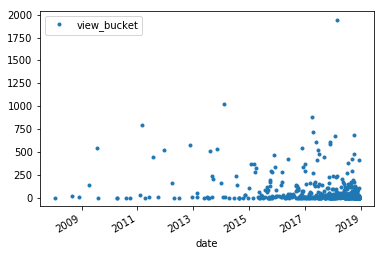

In [19]:

#plt.title('Published date vs. view_bucket')
df.plot(x='date', y='view_bucket', style=".")
print('There are more videos aggregated around 2019.  Since the searches were performed recently,this means that more recently published videos are more relevent.')
print('There does not appear to be a linear or any relationship  between publish date and views.')
print('For simplicity purposes, I will not consider publish date in the linear model')

In [20]:
df.head()


,search_word,contentDetails.caption,contentDetails.definition,contentDetails.duration,licensed,catID,description,localized.description,localized.title,snippet.publishedAt,...,dislikeCount,likeCount,viewCount,view_bucket,date,Aging,Age,age_int,target,duration
0,Siemens,False,hd,PT11M28S,True,27,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS,2018-01-08T11:53:47.000Z,...,80.0,931.0,64279.0,1.0,2018-01-08 11:53:47+00:00,2018-11-28,323 days 12:06:13,323,no rank,688
1,Siemens,False,hd,PT3M19S,False,28,"From digitalisation to automation, weƒ??re cha...","From digitalisation to automation, weƒ??re cha...",What is it like to work at Siemens?,2017-11-20T19:18:50.000Z,...,7.0,70.0,7872.0,1.0,2017-11-20 19:18:50+00:00,2018-11-28,372 days 04:41:10,372,no rank,199
2,Siemens,False,hd,PT2M40S,False,28,Are you interested in what Siemens does and wh...,Are you interested in what Siemens does and wh...,Siemens - More than just business,2013-08-28T11:07:01.000Z,...,52.0,731.0,238602.0,2.0,2013-08-28 11:07:01+00:00,2018-11-28,1917 days 12:52:59,1917,no rank,160
3,Siemens,False,hd,PT4M24S,False,28,The most powerful HVDC transformer in the worl...,The most powerful HVDC transformer in the worl...,"Siemens presents: The first 1,100 kV HVDC Tran...",2018-10-16T12:37:42.000Z,...,204.0,3835.0,177410.0,1.0,2018-10-16 12:37:42+00:00,2018-11-28,42 days 11:22:18,42,blue belt,264
4,Siemens,False,hd,PT27M43S,True,26,Articolul complet pe site: https://cavaleria.r...,Articolul complet pe site: https://cavaleria.r...,Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,2018-11-27T20:11:59.000Z,...,23.0,718.0,18839.0,1.0,2018-11-27 20:11:59+00:00,2018-11-28,0 days 03:48:01,0,no rank,1663


There is an obvious right skew.  Data does not appear normally distributed.


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


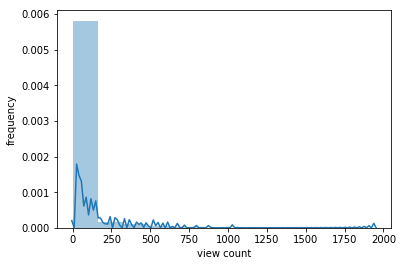

In [21]:
# Apply a distribution plot of view_bucket to see normality
sns.distplot(df['view_bucket'], bins=12)
plt.xlabel('view count')
plt.ylabel('frequency')
print('There is an obvious right skew.  Data does not appear normally distributed.')

# df.hist(bins=15, color='steelblue', edgecolor='black', linewidth=1.0,
#            xlabelsize=8, ylabelsize=8, grid=False)    
# plt.tight_layout(rect=(0, 0, 1.2, 1.2)) 


There are many videos that do not make rank because they did not achieve the taret views within the cutoff date but they do have a lot of views over a long period of time.  These videos could have a different pricing model for ads


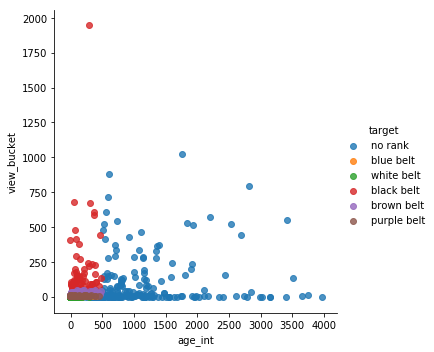

In [22]:
#Scatter plot by belt color

palette = {'no rank':'yellow', 'blue belt':'blue', 'white belt':'white', 'black belt':'black', 'brown belt':'brown', 'purple belt':'purple'}
colors = ['yellow', 'blue','white','black', 'brown', 'purple']
sns.lmplot(x='age_int', y='view_bucket', data=df,
           fit_reg=False, # No regression line
           hue = 'target')   # Color by evolution stage

print('There are many videos that do not make rank because they did not achieve the taret views within the cutoff date but they do have a lot of views over a long period of time.  These videos could have a different pricing model for ads')

Interesting to see outliers for music, dude perfect, donald trump, cats.


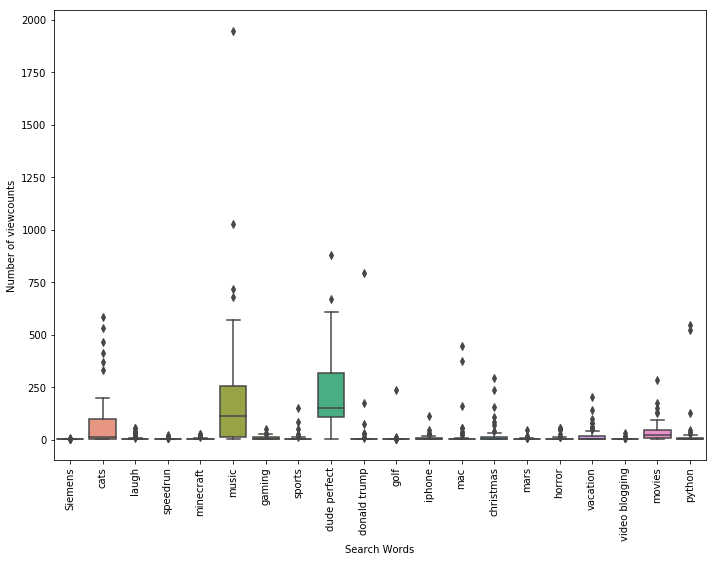

In [23]:
#Plot of view counts by search word


dims = (11.7, 8.27)
fix, ax = plt.subplots(figsize= dims)
g = sns.boxplot(x='search_word', y='view_bucket', data = df)
g.set_xticklabels(g.get_xticklabels(), rotation=90)
plt.xlabel("Search Words")
plt.ylabel("Number of viewcounts")
print('Interesting to see outliers for music, dude perfect, donald trump, cats.')

Average length of a video in seconds 1389.9817997977755
Maximum length of a video in seconds is 42112
Standard deviation of a video in seconds is 2850.836893189657


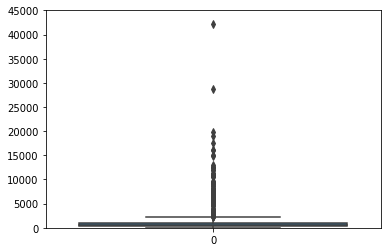

In [24]:
sns.boxplot(data=df['duration'])
plt.ylim(0, 45000)
print('Average length of a video in seconds ' + str(df['duration'].mean()))
print('Maximum length of a video in seconds is ' + str(df['duration'].max()))
print('Standard deviation of a video in seconds is ' + str(df['duration'].std()))



In [25]:
print('The mode of view bucket is the: ' + str(df['view_bucket'].mode()))

The mode of view bucket is the: 0    1.0
dtype: float64


There does not appear to be relationship between video duration and view count


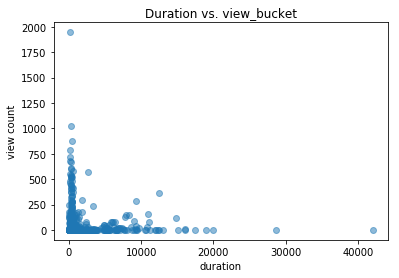

In [26]:

plt.scatter(df['duration'], df['view_bucket'], alpha=0.5)
plt.xlabel('duration')
plt.ylabel('view count')
plt.title('Duration vs. view_bucket')
print('There does not appear to be relationship between video duration and view count')


Spearmans correlation coefficient: -0.018
Duration and views are uncorrelated (fail to reject H0) p=0.566
Since correlation does not exist, will remove duration from consideration.


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


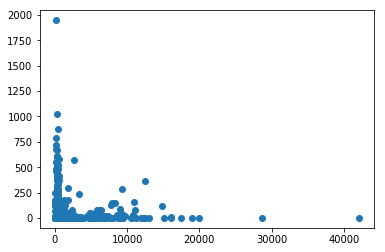

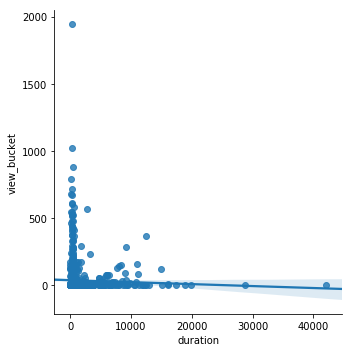

In [27]:
# Perform correlation test on duration vs. views 
plt.scatter(df['duration'], df['view_bucket'])
sns.lmplot(x='duration', y='view_bucket', data=df)

coef, p = spearmanr(df['duration'], df['view_bucket'])

print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Duration and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Duration and views are correlated (reject H0) p=%.3f' % p)
    

print('Since correlation does not exist, will remove duration from consideration.')
df = df.drop(columns=['duration'])

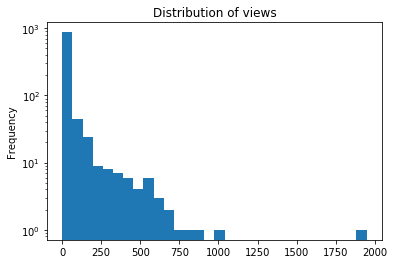

Average view_bucket for all 1000 videos 36.97
Observation: One more outlier is observed


In [28]:
# Distribution of views.  Most frequency appears in under 200,000 views
df['view_bucket'].plot.hist(bins =30)
plt.title('Distribution of views')
plt.yscale('log')
plt.xscale('linear')
plt.show()

print('Average view_bucket for all 1000 videos ' + str(round(df['view_bucket'].mean(),2)))
print('Observation: One more outlier is observed')


[None]

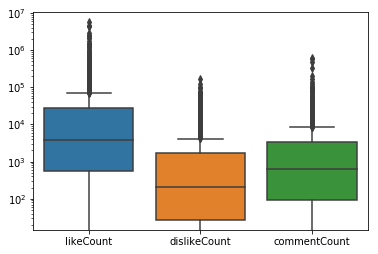

In [29]:
#boxplot shows likeCounts tends to be higher
stats_df = df[['likeCount', 'dislikeCount', 'commentCount']].copy()
ax = sns.boxplot(data=stats_df)
ax.set(yscale="log")

Licensed content does not have relationship w/ views
   licensed  view_bucket
0     False           38
1      True           36
    index     search_word  view_bucket
4       4    dude perfect          236
14     14           music          223
1       1            cats           89
13     13          movies           38
15     15          python           29
10     10             mac           25
2       2       christmas           24
3       3    donald trump           23
18     18        vacation           21
17     17          sports            8
8       8          iphone            8
7       7          horror            7
9       9           laugh            7
5       5          gaming            7
6       6            golf            6
12     12       minecraft            5
11     11            mars            3
19     19  video blogging            3
16     16        speedrun            3
0       0         Siemens            1
    index  catID  view_bucket
2       2     10       

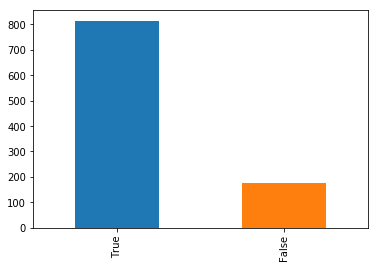

In [30]:
# Analysis of average view count based on licensed content and also search_word
print('Licensed content does not have relationship w/ views') 
df['licensed'].value_counts().plot(kind='bar')

pd.set_option('display.float_format', lambda x: '%i' % x)
print(df.groupby('licensed', as_index=False)['view_bucket'].mean())
grouped_search = df.groupby('search_word', as_index=False)['view_bucket'].mean().reset_index()
print(grouped_search.sort_values('view_bucket', ascending=False))

grouped_id = df.groupby('catID', as_index=False)['view_bucket'].mean().reset_index()
print(grouped_id.sort_values('view_bucket', ascending=False))

print('Search word and video category have strong relationship w/ views ')

# most categoryID views - music, Sports, Pets and Animals


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


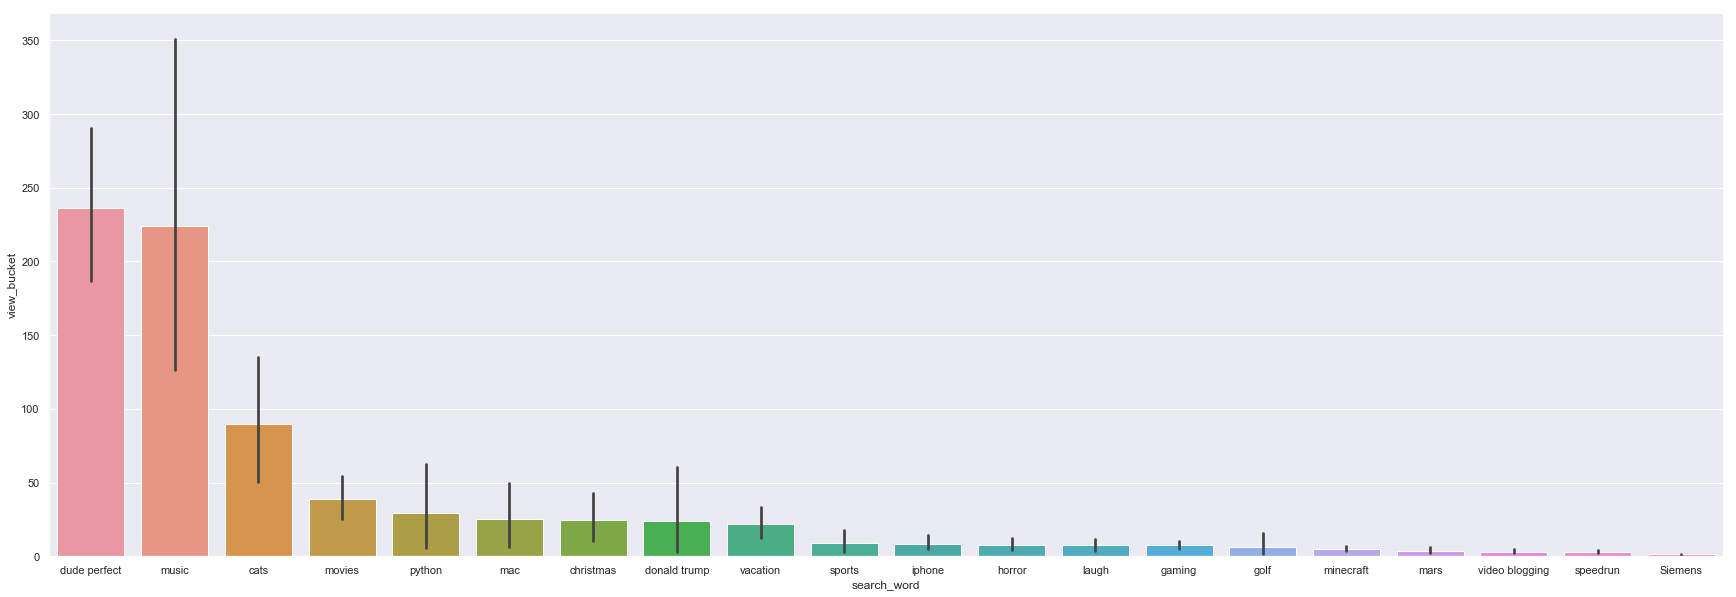

In [31]:
# Bi-variate Analysis

result = df.groupby(["search_word"])['view_bucket'].aggregate(np.mean).reset_index().sort_values('view_bucket', ascending=False)

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x='search_word',y='view_bucket', data=df, order=result['search_word'])




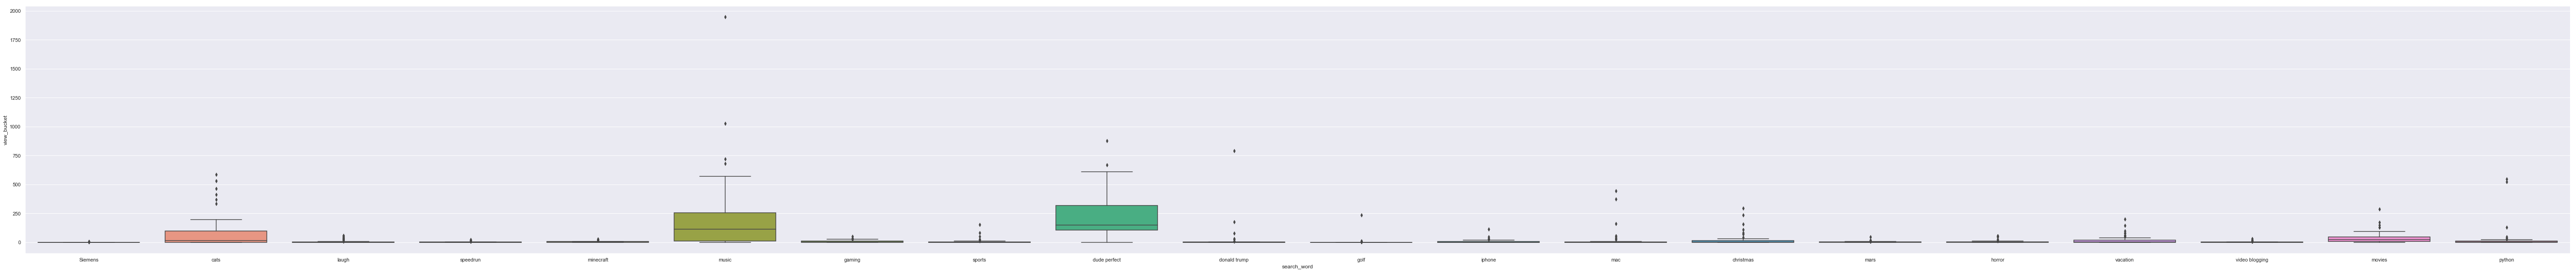

In [32]:
sns.set(rc={'figure.figsize':(100,10)})
sns.boxplot(x="search_word", y="view_bucket", data=df);

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


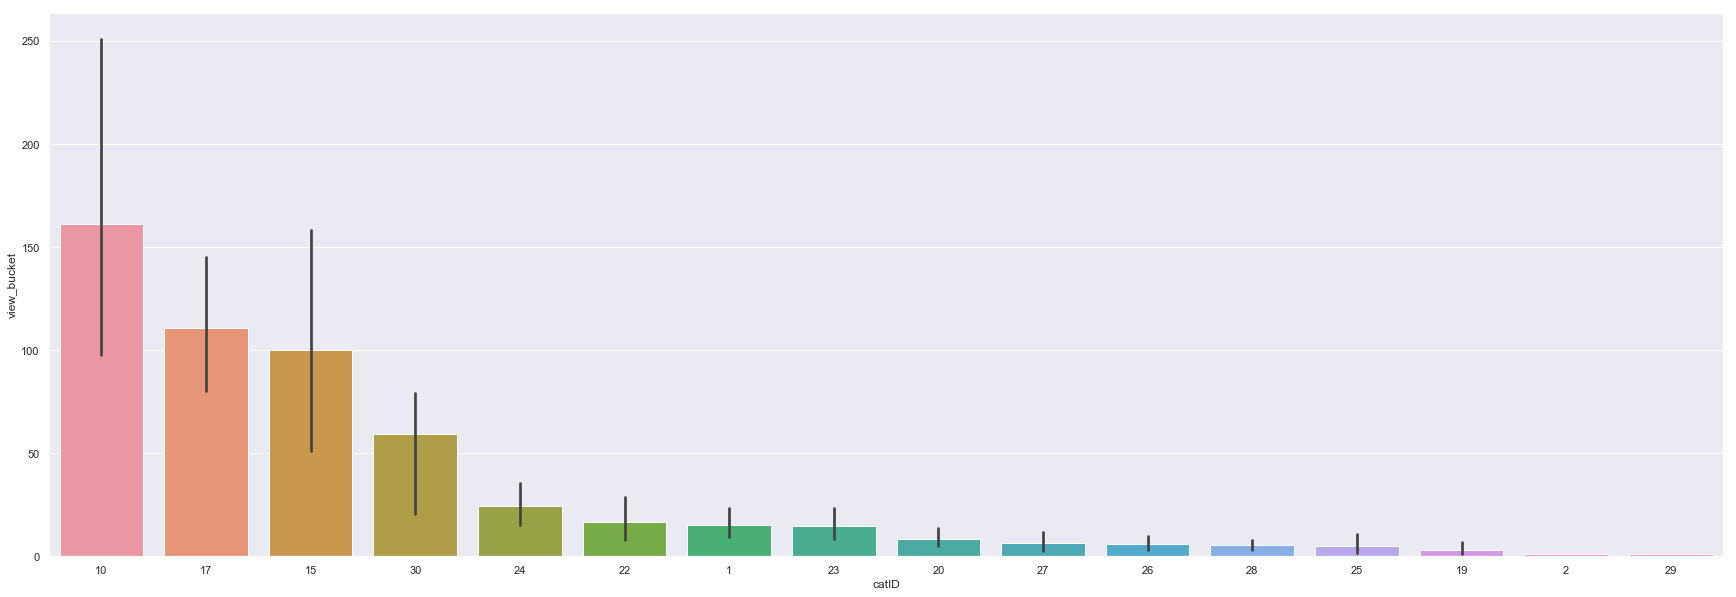

In [33]:
result = df.groupby(['catID'])['view_bucket'].aggregate(np.mean).reset_index().sort_values('view_bucket', ascending=False)

sns.set(rc={'figure.figsize':(30,10)})
sns.barplot(x='catID',y='view_bucket', data=df, order=result['catID'])


C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Spearmans correlation coefficient: -0.246
Category ID and views are correlated (reject H0) p=0.000


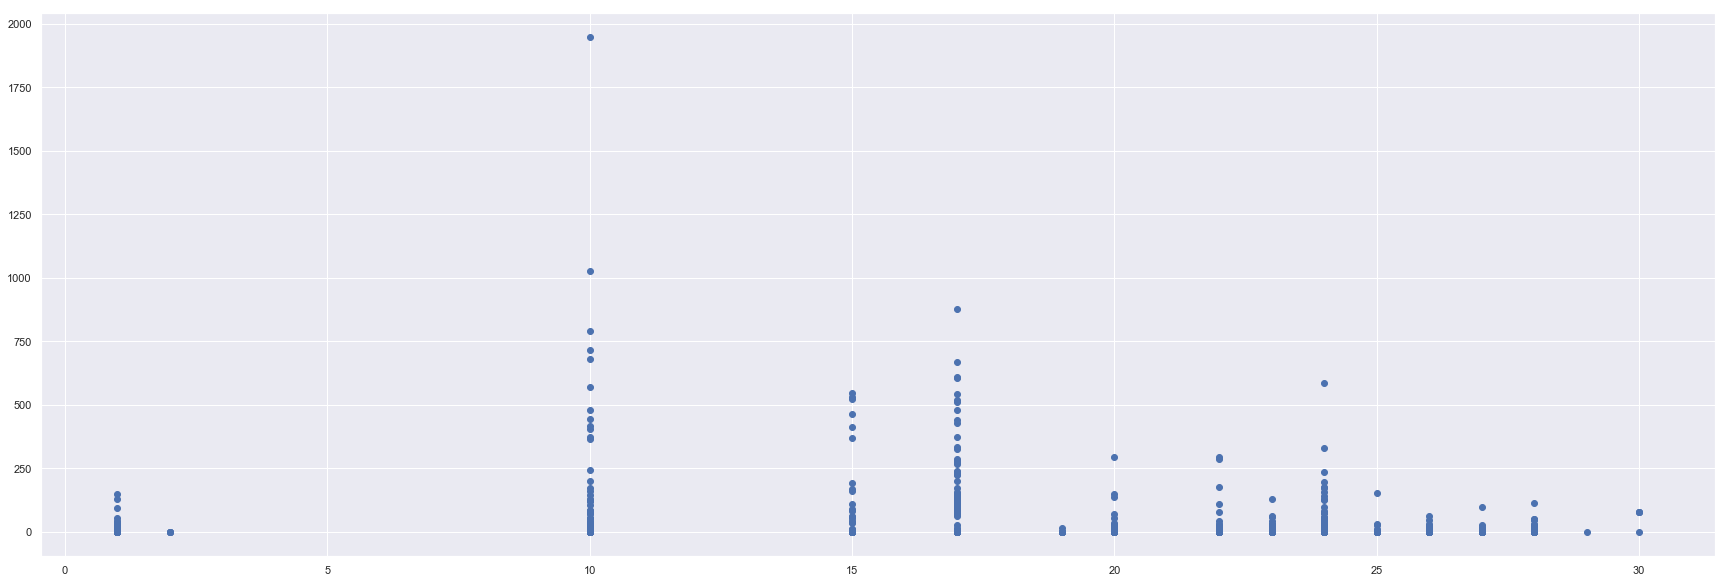

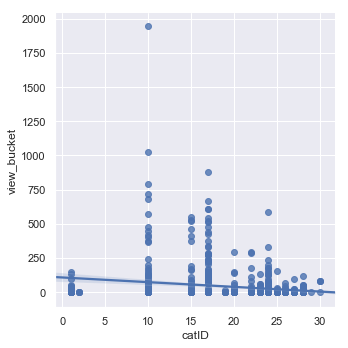

In [34]:
plt.scatter(df['catID'], df['view_bucket'])
sns.lmplot(x='catID', y='view_bucket', data=df)

coef, p = spearmanr(df['catID'], df['view_bucket'])

print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Category ID and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Category ID and views are correlated (reject H0) p=%.3f' % p)

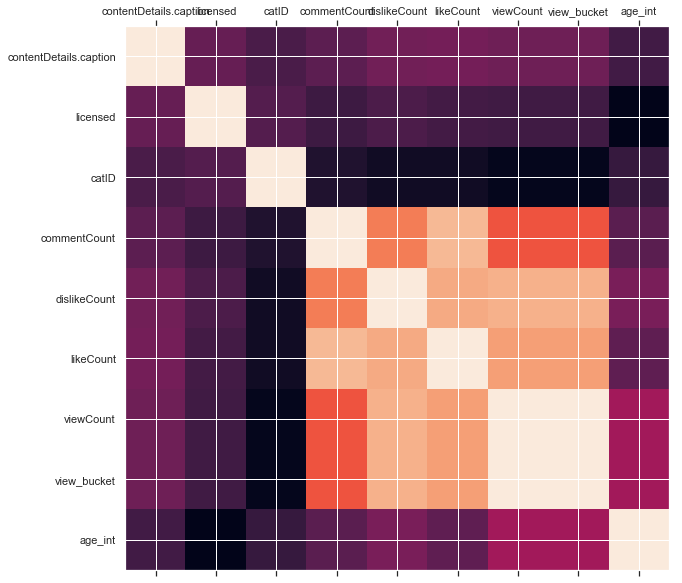

In [35]:
def plot_corr(df,size=10):
    '''Function plots a graphical correlation matrix for each pair of columns in the dataframe.

    Input:
        df: pandas DataFrame
        size: vertical and horizontal size of the plot'''

    corr = df.corr()
    fig, ax = plt.subplots(figsize=(size, size))
    ax.matshow(corr)
    plt.xticks(range(len(corr.columns)), corr.columns);
    plt.yticks(range(len(corr.columns)), corr.columns);
    
plot_corr(df)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Pearsons correlation coefficient: 0.768
LikeCount and views are correlated (reject H0) p=0.000


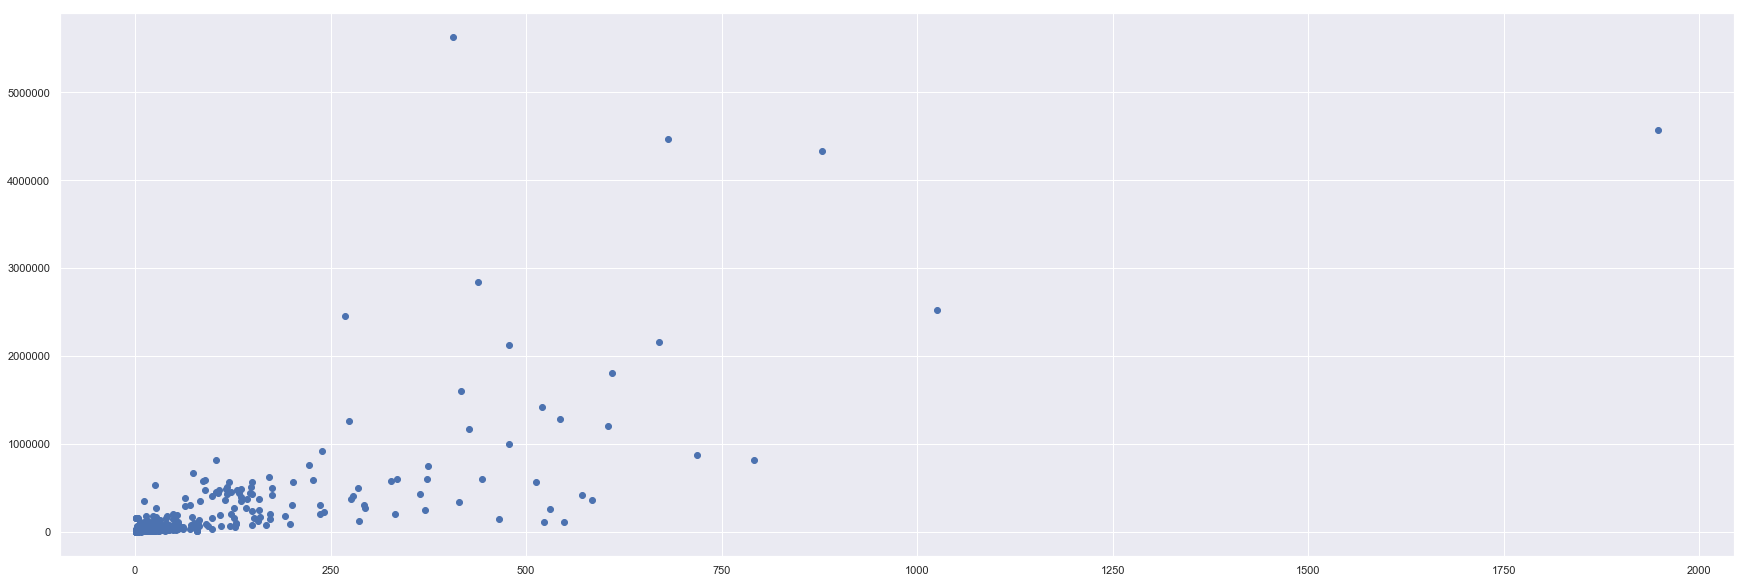

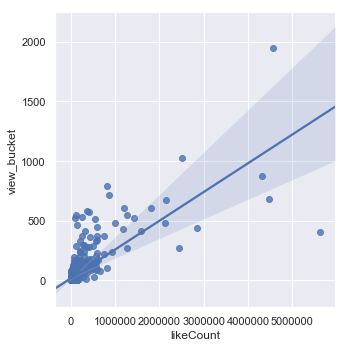

In [36]:
# Dependence test on continuous data
from scipy.stats.stats import pearsonr
plt.scatter(df['view_bucket'], df['likeCount'])
sns.lmplot(x='likeCount', y='view_bucket', data=df)

coef, p = pearsonr(df['likeCount'], df['view_bucket'])

print('Pearsons correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('LikeCount and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('LikeCount and views are correlated (reject H0) p=%.3f' % p)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Spearmans correlation coefficient: 0.818
Dislike count and views are correlated (reject H0) p=0.000


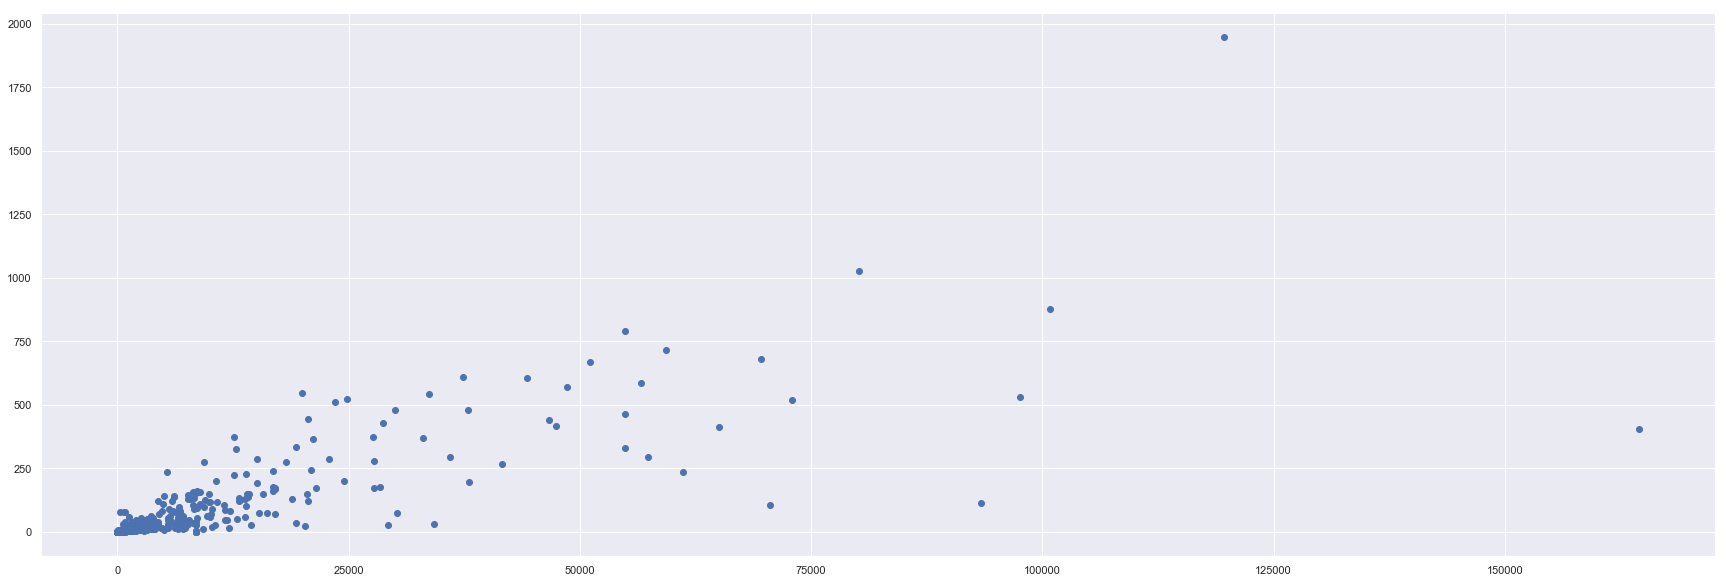

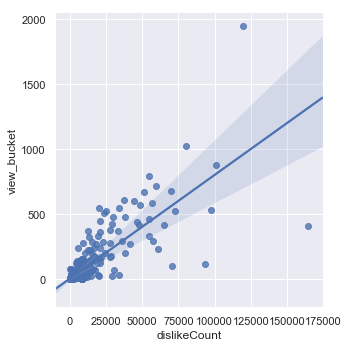

In [37]:
plt.scatter(df['dislikeCount'], df['view_bucket'])
sns.lmplot(x='dislikeCount', y='view_bucket', data=df)

coef, p = pearsonr(df['dislikeCount'], df['view_bucket'])

print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Dislike count and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Dislike count and views are correlated (reject H0) p=%.3f' % p)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Pearsons correlation coefficient: 0.569
Comment count and views are correlated (reject H0) p=0.000


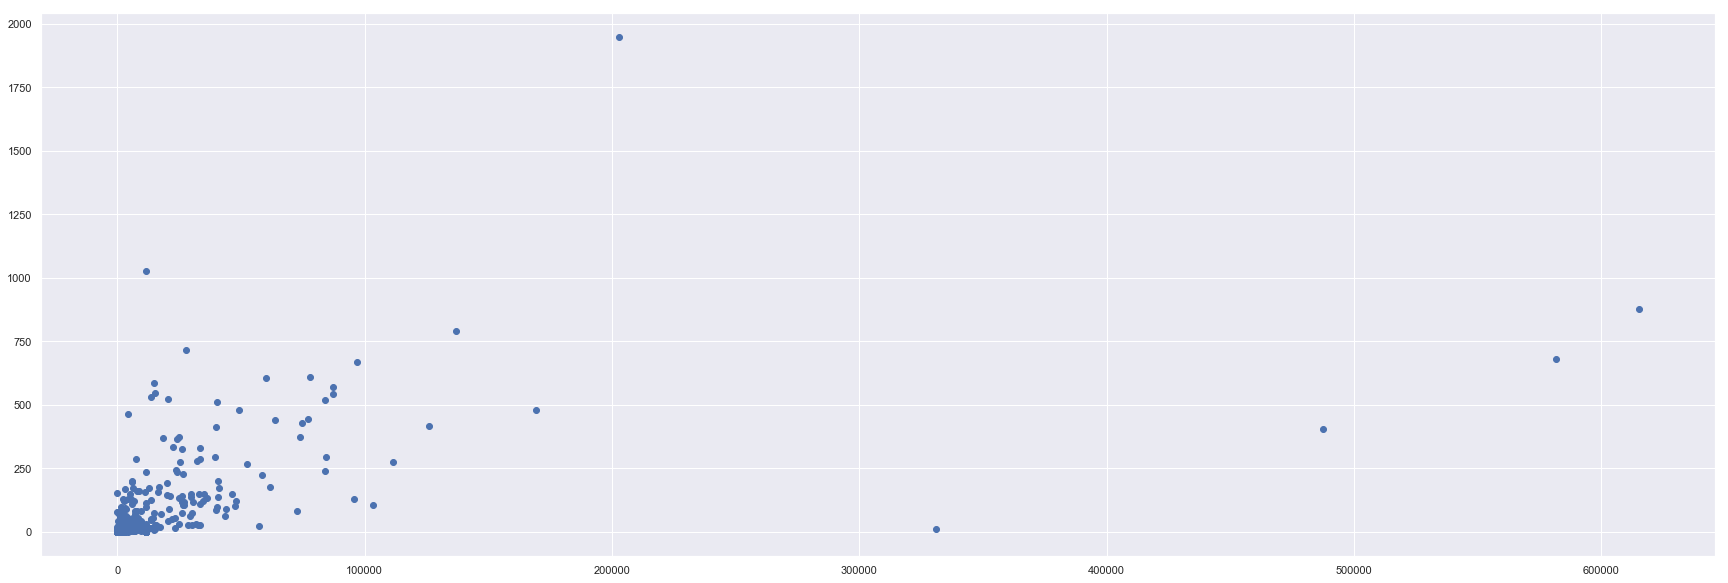

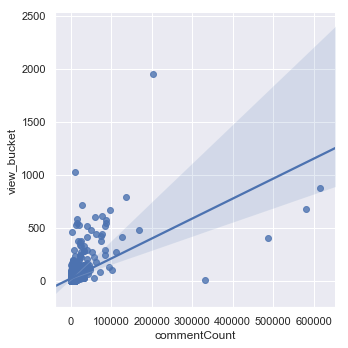

In [38]:
plt.scatter(df['commentCount'], df['view_bucket'])
sns.lmplot(x='commentCount', y='view_bucket', data=df)

coef, p = pearsonr(df['commentCount'], df['view_bucket'])

print('Pearsons correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Comment count and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Comment count and views are correlated (reject H0) p=%.3f' % p)

C:\Users\z002xczx\AppData\Local\Continuum\anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


Spearmans correlation coefficient: 0.027
Licensed content and views are uncorrelated (fail to reject H0) p=0.401


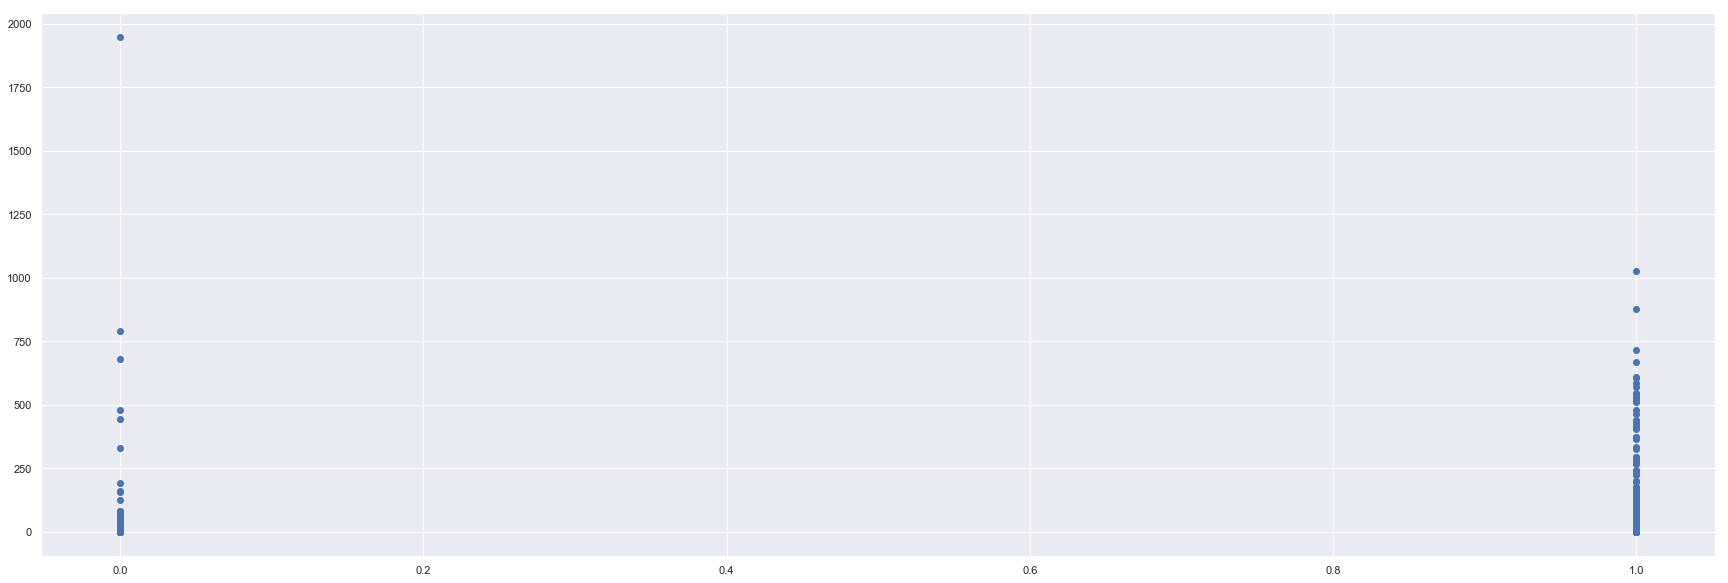

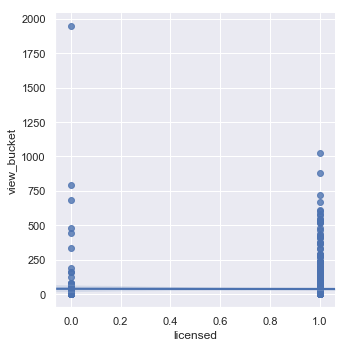

In [39]:
plt.scatter(df['licensed'], df['view_bucket'])
sns.lmplot(x='licensed', y='view_bucket', data=df)

coef, p = spearmanr(df['licensed'], df['view_bucket'])

print('Spearmans correlation coefficient: %.3f' % coef)
# interpret the significance
alpha = 0.05
if p > alpha:
    print('Licensed content and views are uncorrelated (fail to reject H0) p=%.3f' % p)
else:
    print('Licensed content and views are correlated (reject H0) p=%.3f' % p)




In [40]:
#Drop licensed column
df = df.drop(columns=['licensed'])

In [41]:
cleanup_nums = {"target":     {"no rank": 0, "white belt": 1, "blue belt": 2, "purple belt": 3, "brown belt": 4, "black belt": 5}}
df.replace(cleanup_nums, inplace=True)
df.head()

,search_word,contentDetails.caption,contentDetails.definition,contentDetails.duration,catID,description,localized.description,localized.title,snippet.publishedAt,tags,...,commentCount,dislikeCount,likeCount,viewCount,view_bucket,date,Aging,Age,age_int,target
0,Siemens,False,hd,PT11M28S,27,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS,2018-01-08T11:53:47.000Z,"['Alux', 'Alux.com', 'Alux Youtube', 'luxury l...",...,117,80,931,64279,1,2018-01-08 11:53:47+00:00,2018-11-28,323 days 12:06:13,323,0
1,Siemens,False,hd,PT3M19S,28,"From digitalisation to automation, weƒ??re cha...","From digitalisation to automation, weƒ??re cha...",What is it like to work at Siemens?,2017-11-20T19:18:50.000Z,"['Siemens', 'Siemens UK', 'careers', 'jobs', '...",...,11468,7,70,7872,1,2017-11-20 19:18:50+00:00,2018-11-28,372 days 04:41:10,372,0
2,Siemens,False,hd,PT2M40S,28,Are you interested in what Siemens does and wh...,Are you interested in what Siemens does and wh...,Siemens - More than just business,2013-08-28T11:07:01.000Z,"['SIEMENS', 'products', 'Energy', 'Healthcare'...",...,11468,52,731,238602,2,2013-08-28 11:07:01+00:00,2018-11-28,1917 days 12:52:59,1917,0
3,Siemens,False,hd,PT4M24S,28,The most powerful HVDC transformer in the worl...,The most powerful HVDC transformer in the worl...,"Siemens presents: The first 1,100 kV HVDC Tran...",2018-10-16T12:37:42.000Z,"['Siemens', 'HVDC', 'Transformer', '1100kV', '...",...,11468,204,3835,177410,1,2018-10-16 12:37:42+00:00,2018-11-28,42 days 11:22:18,42,2
4,Siemens,False,hd,PT27M43S,26,Articolul complet pe site: https://cavaleria.r...,Articolul complet pe site: https://cavaleria.r...,Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,2018-11-27T20:11:59.000Z,"['Cavaleria.ro', 'hacking', 'siemens', 'job', ...",...,64,23,718,18839,1,2018-11-27 20:11:59+00:00,2018-11-28,0 days 03:48:01,0,0


In [42]:
# Review shape of df to ensure accuracy and store for modeling notebook
print(df.shape)

word_df = df[['search_word','description','localized.description','localized.title','tags','title','target']] 

(989, 21)


In [43]:
df = df.drop(columns=['snippet.publishedAt'])
df = df.drop(columns=['contentDetails.duration'])
df = df.drop(columns=['viewCount'])
df = df.drop(columns=['date'])
df = df.drop(columns=['Aging'])
df = df.drop(columns=['Age'])

# dataframe_tocsv  include column names, index, etc.   when get to modeling, then pickle 
word_data = "word_data.csv"
fileObject = open(word_data, 'wb')
pickle.dump(word_df, fileObject)
fileObject.close()

In [44]:
print(word_df.head())
%store word_df
%store df

  search_word                                        description  \
0     Siemens  15 Things You Didn't Know About SIEMENS | SUBS...   
1     Siemens  From digitalisation to automation, weƒ??re cha...   
2     Siemens  Are you interested in what Siemens does and wh...   
3     Siemens  The most powerful HVDC transformer in the worl...   
4     Siemens  Articolul complet pe site: https://cavaleria.r...   

                               localized.description  \
0  15 Things You Didn't Know About SIEMENS | SUBS...   
1  From digitalisation to automation, weƒ??re cha...   
2  Are you interested in what Siemens does and wh...   
3  The most powerful HVDC transformer in the worl...   
4  Articolul complet pe site: https://cavaleria.r...   

                                     localized.title  \
0            15 Things You Didn't Know About SIEMENS   
1                What is it like to work at Siemens?   
2                  Siemens - More than just business   
3  Siemens presents: The first

In [45]:
df.head()

,search_word,contentDetails.caption,contentDetails.definition,catID,description,localized.description,localized.title,tags,title,commentCount,dislikeCount,likeCount,view_bucket,age_int,target
0,Siemens,False,hd,27,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS | SUBS...,15 Things You Didn't Know About SIEMENS,"['Alux', 'Alux.com', 'Alux Youtube', 'luxury l...",15 Things You Didn't Know About SIEMENS,117,80,931,1,323,0
1,Siemens,False,hd,28,"From digitalisation to automation, weƒ??re cha...","From digitalisation to automation, weƒ??re cha...",What is it like to work at Siemens?,"['Siemens', 'Siemens UK', 'careers', 'jobs', '...",What is it like to work at Siemens?,11468,7,70,1,372,0
2,Siemens,False,hd,28,Are you interested in what Siemens does and wh...,Are you interested in what Siemens does and wh...,Siemens - More than just business,"['SIEMENS', 'products', 'Energy', 'Healthcare'...",Siemens - More than just business,11468,52,731,2,1917,0
3,Siemens,False,hd,28,The most powerful HVDC transformer in the worl...,The most powerful HVDC transformer in the worl...,"Siemens presents: The first 1,100 kV HVDC Tran...","['Siemens', 'HVDC', 'Transformer', '1100kV', '...","Siemens presents: The first 1,100 kV HVDC Tran...",11468,204,3835,1,42,2
4,Siemens,False,hd,26,Articolul complet pe site: https://cavaleria.r...,Articolul complet pe site: https://cavaleria.r...,Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,"['Cavaleria.ro', 'hacking', 'siemens', 'job', ...",Ce ??nseamnŽŸ sŽŸ lucrezi la Siemens - Cavaler...,64,23,718,1,0,0
